In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("project_ipl_2022_death_overs_players_batting.csv")

In [3]:
df.head()

,Player,Team_shortform,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches
0,TH David,MI,6,147,62,4,36.75,237.10,44,9,13,0,0,15.50,2.82,21.46,100.00,6.19,100.00,20
1,KD Karthik,RCB,13,251,121,3,83.67,207.44,53,19,19,1,0,40.33,3.18,62.29,74.38,27.08,91.91,90
2,AR Patel,DC,6,127,70,0,127.00,181.43,33,8,8,0,0,127.00,4.38,100.00,51.92,100.00,64.94,20
3,JC Buttler,RR,7,174,78,5,34.80,223.08,52,11,15,1,0,15.60,3.00,19.76,87.89,6.27,95.96,30
4,AK Markram,SRH,6,111,53,2,55.50,209.43,32,8,7,0,0,26.50,3.53,37.78,76.10,15.44,84.04,20


In [4]:
features = ["Normalized Avg", "Normalized SR", "Normalized BPW", "Normalized BPB","Normalized Matches"]

In [5]:
df = df.dropna(subset=features)

In [6]:
data = df[features].copy()

In [7]:
data

,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches
0,21.46,100.00,6.19,100.00,20
1,62.29,74.38,27.08,91.91,90
2,100.00,51.92,100.00,64.94,20
3,19.76,87.89,6.27,95.96,30
4,37.78,76.10,15.44,84.04,20
5,12.80,78.93,3.75,92.58,30
6,31.42,56.58,14.86,78.20,90
7,30.38,59.79,13.90,80.22,20
8,39.08,59.32,18.39,88.54,0
9,29.51,45.71,15.36,61.12,100


In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 

In [9]:
data.describe()

,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.146125,4.518708,1.239708,6.318333,4.416667
std,2.251755,2.590568,1.982437,2.572645,2.932823
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.764500,2.690750,0.375000,3.949750,2.000000
50%,1.729000,4.461500,0.665000,6.550500,3.000000
75%,2.972750,5.943750,1.435000,8.387500,5.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data.head()

,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches
0,2.146,10.000,0.619,10.000,2.0
1,6.229,7.438,2.708,9.191,9.0
2,10.000,5.192,10.000,6.494,2.0
3,1.976,8.789,0.627,9.596,3.0
4,3.778,7.610,1.544,8.404,2.0


In [11]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [12]:
centroids = random_centroids(data, 5)

In [13]:
centroids

,0,1,2,3,4
Normalized Avg,0.091,0.601,3.778,6.229,0.819
Normalized SR,5.932,7.438,4.571,3.110,4.452
Normalized BPW,0.619,0.619,0.341,0.026,1.278
Normalized BPB,6.494,3.461,5.506,3.865,3.461
Normalized Matches,5.000,3.000,7.000,7.000,9.000


In [14]:


def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)



In [15]:


labels = get_labels(data, centroids)



In [16]:


labels.value_counts()



0    14
2     5
4     4
3     1
dtype: int64

In [17]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [19]:


def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()



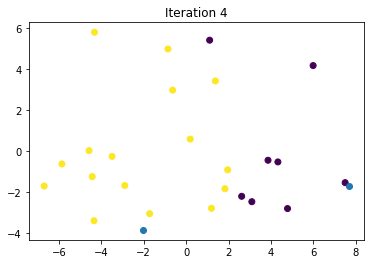

In [20]:


max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1



In [21]:


centroids



,0,2
Normalized Avg,0.000000,1.908793
Normalized SR,0.000000,5.427509
Normalized BPW,0.235714,0.000000
Normalized BPB,0.000000,7.631563
Normalized Matches,4.909466,0.000000


In [22]:
labels.value_counts()

2    16
0     8
dtype: int64

In [25]:


df[labels == 0][["Player"] + features]



,Player,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches
9,DA Miller,29.51,45.71,15.36,61.12,100
17,A Badoni,11.45,27.39,7.03,39.78,30
18,RA Jadeja,6.01,25.46,3.75,34.61,50
19,SN Thakur,0.30,24.78,0.12,33.03,50
20,R Parag,0.00,18.74,0.26,32.81,100
21,HH Pandya,19.94,16.14,14.18,33.71,30
22,KA Pollard,0.36,3.19,1.56,0.00,50
23,RD Chahar,2.36,0.00,3.41,38.65,30


In [26]:


from sklearn.cluster import KMeans



In [27]:


kmeans = KMeans(3)
kmeans.fit(data)



KMeans(n_clusters=3)

In [28]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
Normalized Avg,2.413000,3.573000,0.670222
Normalized SR,4.737143,6.980875,2.160222
Normalized BPW,1.141714,2.209000,0.454333
Normalized BPB,6.950143,8.528000,3.862778
Normalized Matches,8.285714,1.875000,3.666667
